In [1]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
# Analyzing and describing data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Variable Notes

*pclass*: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower


*age*: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5


*sibsp*: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)


*parch*: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.


*embarked*: Port of Embarkation

C = Cherbourg

Q = Queenstown

S = Southampton

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McEvoy, Mr. Michael",male,1601,B96 B98,S
freq,1,577,7,4,644


In [8]:
print(train_df.info())
print(train_df.shape)
print(test_df.info())
print(test_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417

In [31]:
print(train_df[['Sex', 'Survived']].groupby(['Sex']).mean())

     Survived
Sex          
0    0.188908
1    0.742038


In [9]:
print(train_df[['Sex', 'Survived']].groupby(['Sex']).mean())
print(train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean())
print(train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
print(train_df[['Parch', 'Survived']].groupby(['Parch']).mean())
print(train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean())

        Survived
Sex             
female  0.742038
male    0.188908
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


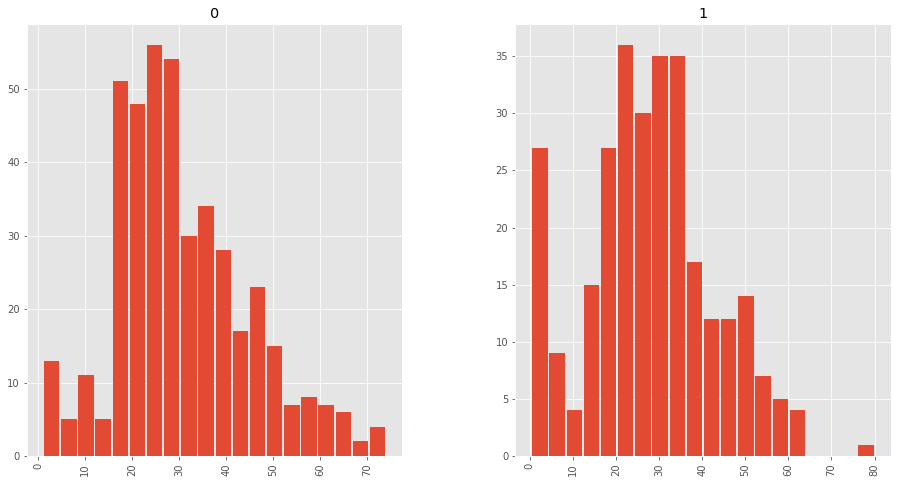

In [10]:
plt.style.use('ggplot')
print(train_df.hist(column='Age', by='Survived', figsize=(15,8), bins=20, rwidth=0.9))


In [11]:
#Creating age bands
train_df.Age = train_df.Age.fillna(train_df['Age'].mean())
test_df.Age = test_df.Age.fillna(train_df['Age'].mean())

train_df['Age band'] = pd.cut(train_df.Age, 6)
train_df[['Age band', 'Survived']].groupby(['Age band'], as_index=False).mean().sort_values(by='Age band', ascending=True)

,Age band,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.372038
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


In [12]:
combine = [train_df, test_df]

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age band
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,"(13.683, 26.947]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C,"(26.947, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(13.683, 26.947]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S,"(26.947, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S,"(26.947, 40.21]"


In [13]:
train_df = train_df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Age band'])
test_df = test_df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])


In [14]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,1.0,7.2500,S
1,1,1,female,2.0,71.2833,C
2,1,3,female,1.0,7.9250,S
3,1,1,female,2.0,53.1000,S
4,0,3,male,2.0,8.0500,S


In [15]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,2.0,7.8292,Q
1,3,female,2.0,7.0000,S
2,2,male,3.0,9.6875,Q
3,3,male,1.0,8.6625,S
4,3,female,1.0,12.2875,S


In [16]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)
test_df['Embarked'] = test_df['Embarked'].fillna(freq_port)


train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [17]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,1.0,7.2500,0
1,1,1,female,2.0,71.2833,1
2,1,3,female,1.0,7.9250,0
3,1,1,female,2.0,53.1000,0
4,0,3,male,2.0,8.0500,0


In [18]:
train_df['Sex'] = train_df['Sex'].map( {'male':0, 'female':1} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'male':0, 'female':1} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,1.0,7.2500,0
1,1,1,1,2.0,71.2833,1
2,1,3,1,1.0,7.9250,0
3,1,1,1,2.0,53.1000,0
4,0,3,0,2.0,8.0500,0


In [19]:
train_df['FareBand'] = pd.qcut(train_df.Fare, 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [20]:
# Fill NAs using mode
#test_df.Fare = test_df.Fare.fillna(test_df.Fare.dropna().mode(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass      418 non-null int64
Sex         418 non-null int32
Age         418 non-null float64
Fare        418 non-null float64
Embarked    418 non-null int32
dtypes: float64(2), int32(2), int64(1)
memory usage: 13.1 KB


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
Fare        891 non-null float64
Embarked    891 non-null int32
FareBand    891 non-null category
dtypes: category(1), float64(2), int32(2), int64(2)
memory usage: 35.8 KB


In [22]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FareBand
0,0,3,0,1.0,0.0,0,"(-0.001, 7.91]"
1,1,1,1,2.0,3.0,1,"(31.0, 512.329]"
2,1,3,1,1.0,1.0,0,"(7.91, 14.454]"
3,1,1,1,2.0,3.0,0,"(31.0, 512.329]"
4,0,3,0,2.0,1.0,0,"(7.91, 14.454]"
5,0,3,0,1.0,1.0,2,"(7.91, 14.454]"
6,0,1,0,3.0,3.0,0,"(31.0, 512.329]"
7,0,3,0,0.0,2.0,0,"(14.454, 31.0]"
8,1,3,1,1.0,1.0,0,"(7.91, 14.454]"
9,1,2,1,0.0,2.0,1,"(14.454, 31.0]"


In [23]:
test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3

test_df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,2.0,0.0,2
1,3,1,2.0,0.0,0
2,2,0,3.0,1.0,2
3,3,0,1.0,1.0,0
4,3,1,1.0,1.0,0


In [24]:
train_df.Fare = train_df['Fare'].astype(int)
train_df.Age = train_df['Age'].astype(int)
train_df.drop
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FareBand
0,0,3,0,1,0,0,"(-0.001, 7.91]"
1,1,1,1,2,3,1,"(31.0, 512.329]"
2,1,3,1,1,1,0,"(7.91, 14.454]"
3,1,1,1,2,3,0,"(31.0, 512.329]"
4,0,3,0,2,1,0,"(7.91, 14.454]"


In [25]:
test_df.Fare = test_df['Fare'].astype(int)
test_df.Age = test_df['Age'].astype(int)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,2,0,2
1,3,1,2,0,0
2,2,0,3,1,2
3,3,0,1,1,0
4,3,1,1,1,0


In [26]:
# Apply log reg model

In [27]:
# Predict results